# Описание данных:

Данные содержат информацию о показателях здоровья, собранных с умных часов.

### Структура данных:

| Название столбца            | Описание                                        |
|-----------------------------|-------------------------------------------------|
| **User ID**                 | Уникальный идентификатор пользователя           |
| **Heart Rate (BPM)**        | Частота сердечных сокращений (ударов в минуту)  |
| **Blood Oxygen Level (%)**  | Уровень насыщения крови кислородом              |
| **Step Count**              | Количество шагов за период                      |
| **Sleep Duration (hours)**  | Продолжительность сна в часах                   |
| **Activity Level**          | Уровень активности пользователя                 |
| **Stress Level**            | Уровень стресса (шкала от 1 до 10)              |

Данный датасет взят с сайта https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned/data

# Подключение библиотек

In [1]:
# подключение библиотеки pandas
import pandas as pd 
# подключение библиотеки matplotlib.pyplot
import matplotlib.pyplot as plt
# подключение библиотеки seaborn
import seaborn as sns

# Чтение и вывод данных

In [2]:
# читаем исходный DataFrame (df) из файла
df = pd.read_csv("data/unclean_smartwatch_health_data.csv")
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


# Группировка данных

In [18]:
#  Создаем копию исходного DataFrame (df) для дальнейшей обработки.
df_copy = df.copy()

### Подсчет количества отсутствующих значений

In [19]:
for i in range(7):
    num = df.iloc[:, i].isnull().sum()  # вычисление числа отсутствующих значений для каждого столбца
    # вывод названия столбца, количества остутствующих значений и отношение количества пропущенных значений к общему числу строк
    print(list(df.columns)[i].ljust(30) + ' ' + str(num).ljust(5) + ' ' + str(num / 10000 * 100) + '%')

User ID                        201   2.01%
Heart Rate (BPM)               400   4.0%
Blood Oxygen Level (%)         300   3.0%
Step Count                     100   1.0%
Sleep Duration (hours)         150   1.5%
Activity Level                 200   2.0%
Stress Level                   200   2.0%


### Группировка данных

In [20]:
# Исправляем опечатки и приводим значения в столбце 'Activity Level' к корректному формату.
df_copy['Activity Level'] = df_copy['Activity Level'].str.replace('Highly_Active', 'Highly Active') 
df_copy['Activity Level'] = df_copy['Activity Level'].str.replace('Seddentary', 'Sedentary')
df_copy['Activity Level'] = df_copy['Activity Level'].str.replace('Actve', 'Active')

### Разбиение числовых данных

### Столбец Heart Rate (BPM)

In [21]:
# Преобразуем столбец 'Heart Rate (BPM)' в числовой формат
df_copy['Heart Rate (BPM)'] = pd.to_numeric(df_copy['Heart Rate (BPM)'], errors='coerce')  
# Разделяем значения столбца 'Heart Rate (BPM)' на интервалы (диапазоны) с помощью функции pd.cut()
df_copy['Heart Rate (BPM)'] = pd.cut(
    df['Heart Rate (BPM)'],      # Столбец, который нужно разделить на интервалы
    bins=[0, 50, 60, 70, 80 , 90, 100, 200, 300],              # Границы интервалов                             
    labels=['0-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-200', '200+'],   # Метки для интервалов
    right=False   # Указывает, что правая граница интервала не включается 
)

### Столбец Blood Oxygen Level (%)

In [22]:
# Преобразуем столбец 'Blood Oxygen Level (%)' в числовой формат
df_copy['Blood Oxygen Level (%)'] = pd.to_numeric(df['Blood Oxygen Level (%)'], errors='coerce') 
# Разделяем значения столбца 'Blood Oxygen Level (%)' на интервалы (диапазоны) с помощью функции pd.cut()
df_copy['Blood Oxygen Level (%)'] = pd.cut(
    df['Blood Oxygen Level (%)'],     # Столбец, который нужно разделить на интервалы
    bins = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],     # Границы интервалов                                              
    labels = ['90-91', '91-92', '92-93', '93-94', '94-95', '95-96', '96-97', '97-98', '98-99', '99-100'],    # Метки для интервалов
    right = False    # Указывает, что правая граница интервала не включается 
)

### Столбец Step Count

In [23]:
# Преобразуем столбец 'Step Count' в числовой формат
df_copy['Step Count'] = pd.to_numeric(df['Step Count'], errors='coerce')
# Разделяем значения столбца 'Step Count' на интервалы (диапазоны) с помощью функции pd.cut()
df_copy['Step Count'] = pd.cut(
    df['Step Count'],   # Столбец, который нужно разделить на интервалы
    bins=[0, 2000, 4000, 6000, 8000, 10000, 200000],  # Границы интервалов
    labels=['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000+'],  # Метки для интервалов
    right=False  # Указывает, что правая граница интервала не включается
)

### Столбец Sleep Duration (hours)

In [24]:
# Преобразуем столбец 'Sleep Duration (hours)' в числовой формат.
df_copy['Sleep Duration (hours)'] = pd.to_numeric(df_copy['Sleep Duration (hours)'], errors='coerce')
# Разделяем значения столбца 'Sleep Duration (hours)' на интервалы (диапазоны) с помощью функции pd.cut()
df_copy['Sleep Duration (hours)'] = pd.cut(
    df_copy['Sleep Duration (hours)'],    # Столбец, который нужно разделить на интервалы
    bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],         # Границы интервалов
    labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10+'],       # Метки для интервалов
    right=False   # Указывает, что правая граница интервала не включается
)

### Просмотр уникальные значений в каждом столбце

In [25]:
# Проходим по всем столбцам DataFrame df_copy с помощью цикла for.
for column in df_copy.columns:
    #  Для каждого столбца вычисляем количество уникальных значений
    value_counts = df_copy[column].value_counts(dropna = False) 
    print(value_counts)
    print("-" * 50)

User ID
NaN       201
3773.0     10
3708.0     10
4854.0      9
1684.0      9
         ... 
2025.0      1
4518.0      1
2108.0      1
2420.0      1
1466.0      1
Name: count, Length: 3635, dtype: int64
--------------------------------------------------
Heart Rate (BPM)
70-80      2481
60-70      2045
80-90      2013
50-60      1080
90-100     1044
100-200     469
0-50        418
NaN         400
200+         50
Name: count, dtype: int64
--------------------------------------------------
Blood Oxygen Level (%)
97-98     1830
NaN       1826
98-99     1825
99-100    1519
96-97     1459
95-96      895
94-95      434
93-94      163
92-93       37
91-92       11
90-91        1
Name: count, dtype: int64
--------------------------------------------------
Step Count
0-2000        2455
10000+        2391
2000-4000     1793
4000-6000     1422
6000-8000     1044
8000-10000     795
NaN            100
Name: count, dtype: int64
--------------------------------------------------
Sleep Duration (hours)


# Предварительная визуализация

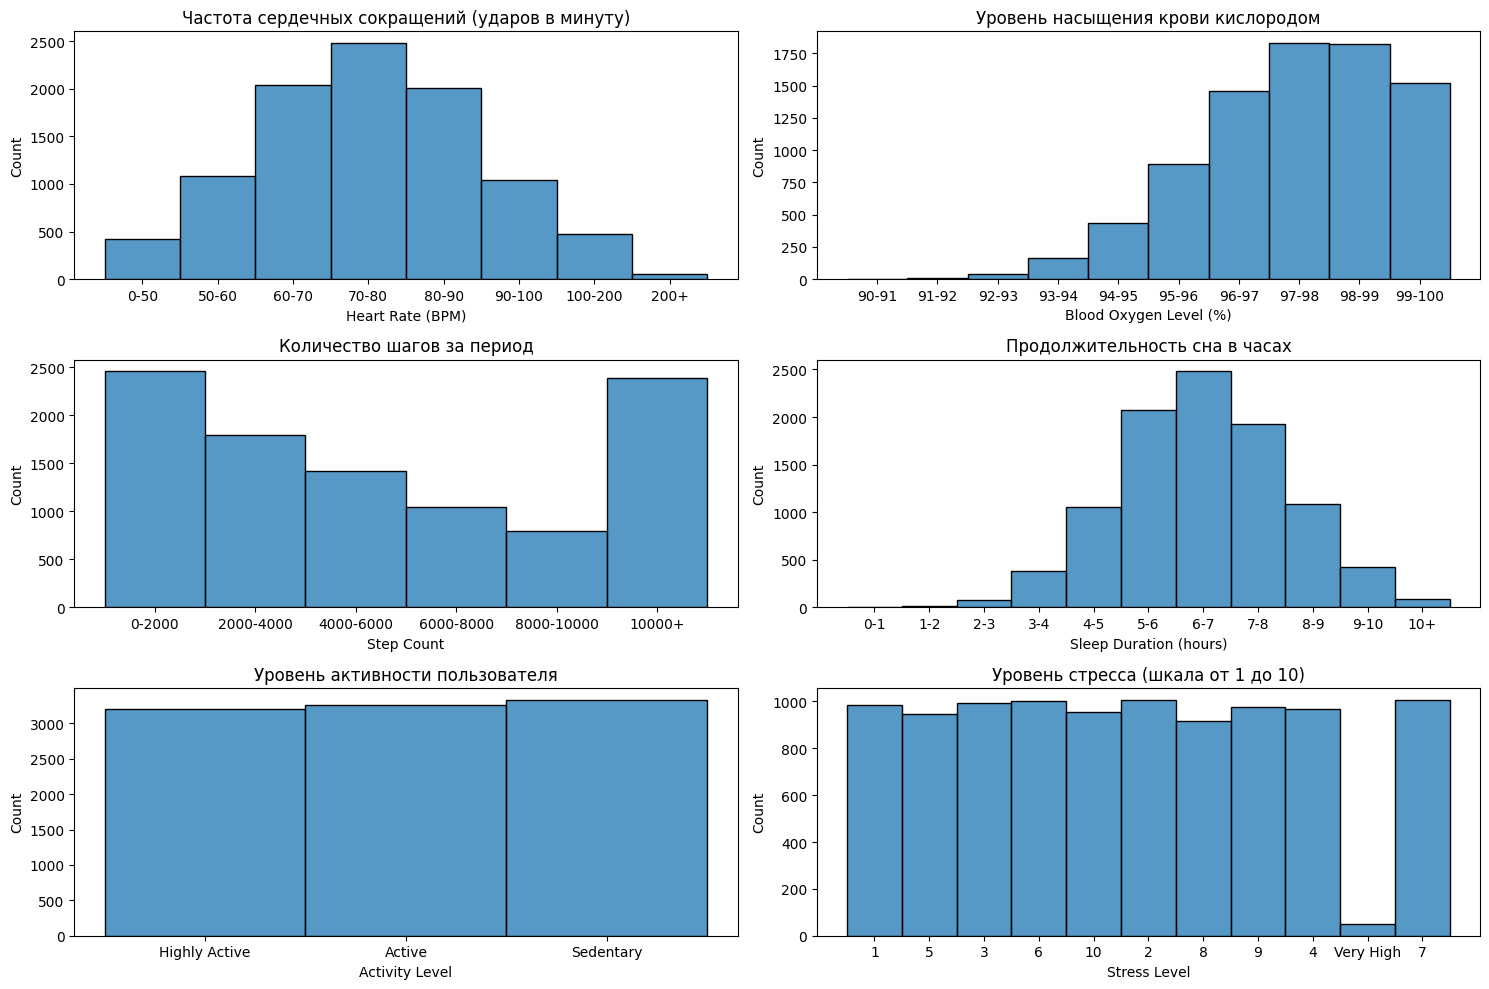

In [26]:
# Создание сетки графиком
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
# строим гистрограммы для каждого столбца DataFrame, где указывается столбец DataFrame и положение в сетки
sns.histplot(df_copy['Heart Rate (BPM)'], ax = axes[0][0])
sns.histplot(df_copy['Blood Oxygen Level (%)'], ax = axes[0][1])
sns.histplot(df_copy['Step Count'], ax = axes[1][0])
sns.histplot(df_copy['Sleep Duration (hours)'], ax = axes[1][1])
sns.histplot(df_copy['Activity Level'], ax = axes[2][0])
sns.histplot(df_copy['Stress Level'], ax = axes[2][1])
# для каждого графика в сетке задаем заголовок
axes[0][0].set_title('Частота сердечных сокращений (ударов в минуту)')
axes[0][1].set_title('Уровень насыщения крови кислородом')
axes[1][0].set_title('Количество шагов за период')
axes[1][1].set_title('Продолжительность сна в часах')
axes[2][0].set_title('Уровень активности пользователя')
axes[2][1].set_title('Уровень стресса (шкала от 1 до 10)')
plt.tight_layout()          # задаем автоматическую настройку расположения графиком
plt.show()        # отображаем все графики на экране

**Вывод** : на основе этих диаграмма можно наглядно увидеть какие данные в каждом столбце

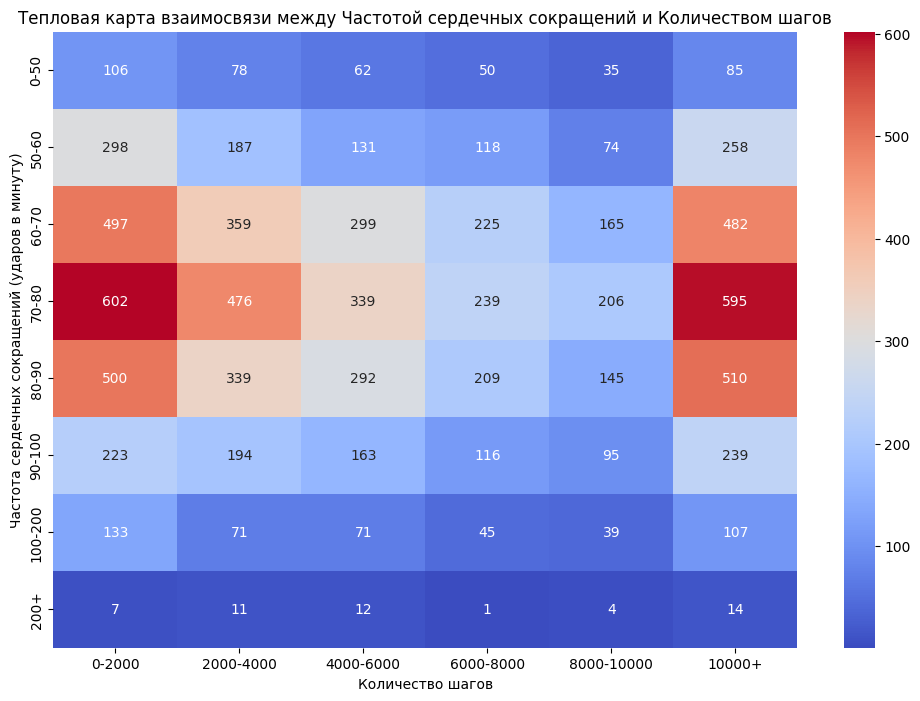

In [27]:
# Создание сводной таблицы
pivot_table = pd.pivot_table(
    df_copy,  
    index="Heart Rate (BPM)",  # индекс сводной таблицы
    columns="Step Count",    # столбец сводной таблицы
    aggfunc="size",     # подсчитывает количество записей для каждой комбинации
    fill_value=0,      # заполнитель пропущенных значений
    observed='True'    # рассматриваются только реальные категории
)
# Построение тепловой карты
plt.figure(figsize=(12, 8))     # задаёт размер графика в дюймах
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)   # строит тепловую карту
plt.title("Тепловая карта взаимосвязи между Частотой сердечных сокращений и Количеством шагов")    # задает заголовок
plt.xlabel("Количество шагов")     # добавляет подпись к оси x
plt.ylabel("Частота сердечных сокращений (ударов в минуту)")    # добавляет подпись к оси y
plt.show()   # отображает тепловую карту

**Вывод:** Тепловая карта наглядно демонстрирует зависимость между уровнем физической активности (количеством шагов) и частотой сердечных сокращений. В целом наблюдается тенденция к увеличению частоты сердечных сокращений по мере роста активности, хотя основная масса данных сосредоточена в диапазоне средней активности и средних значений частоты сердечных сокращений. Дальнейший анализ поможет выявить возможные аномалии и уточнить закономерности.

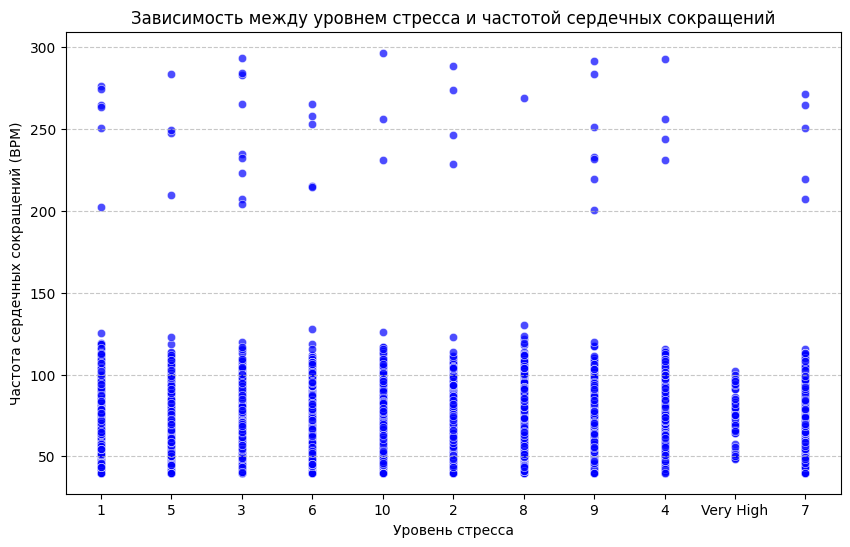

In [41]:
# Создаем новый график с указанными размерами (ширина: 10, высота: 6)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,    # используемые данные
    x="Stress Level",   # ось X представляет уровень стресса
    y="Heart Rate (BPM)",   # ось Y представляет частоту сердечных сокращений (в ударах в минуту)
    alpha=0.7,          # устанавливаем прозрачность точек для лучшей читаемости графика
    color='blue'        # задаем цвет точек на графике
)
# Добавляем заголовок графика
plt.title("Зависимость между уровнем стресса и частотой сердечных сокращений")
# Подписываем ось X (горизонтальная) как "Уровень стресса"
plt.xlabel("Уровень стресса")
# Подписываем ось Y (вертикальная) как "Частота сердечных сокращений (BPM)"
plt.ylabel("Частота сердечных сокращений (BPM)")
# Добавляем сетку по оси Y для удобства чтения значений
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Отображаем график на экране
plt.show()

**Вывод:** Уровень стресса влияет на частоту сердечных сокращений. Разброс данных увеличивается с ростом стресса: при высоком уровне стресса реакция организма становится менее предсказуемой. Возможность наличия выбросов: точки, сильно отличающиеся от основной тенденции, требуют дополнительного анализа для выявления причин их возникновения.

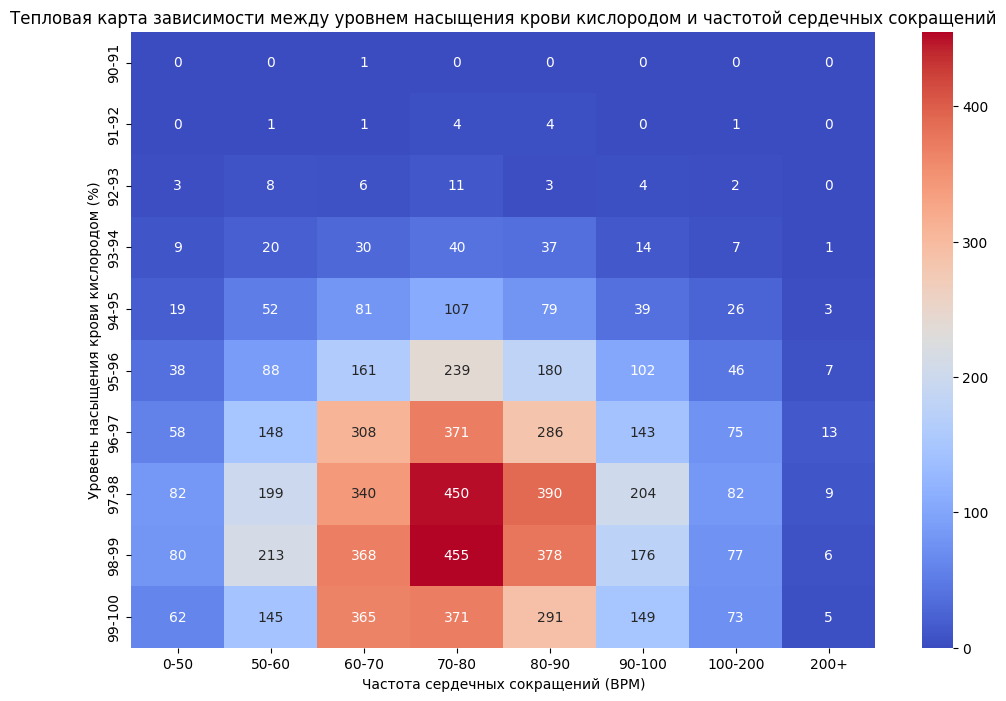

In [38]:
# Создание сводной таблицы
pivot_table = pd.pivot_table(
    df_copy,  
    index="Blood Oxygen Level (%)",  # индекс сводной таблицы
    columns="Heart Rate (BPM)",    # столбец сводной таблицы
    aggfunc="size",     # подсчитывает количество записей для каждой комбинации
    fill_value=0,      # заполнитель пропущенных значений
    observed='True'    # рассматриваются только реальные категории
)
# Построение тепловой карты
plt.figure(figsize=(12, 8))     # задаёт размер графика в дюймах
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)   # строит тепловую карту
plt.title("Тепловая карта зависимости между уровнем насыщения крови кислородом и частотой сердечных сокращений")    # задает заголовок
plt.xlabel("Частота сердечных сокращений (BPM)")     # добавляет подпись к оси x
plt.ylabel("Уровень насыщения крови кислородом (%)")    # добавляет подпись к оси y
plt.show()   # отображает тепловую карту

**Вывод:** Тепловая карта показывает, что у большинства пользователей нормальные физиологические показатели (уровень насыщения крови кислородом около 95–97% и частота сердечных сокращений в диапазоне 60–80 ударов в минуту ). Аномальные значения встречаются редко и могут указывать на патологии.

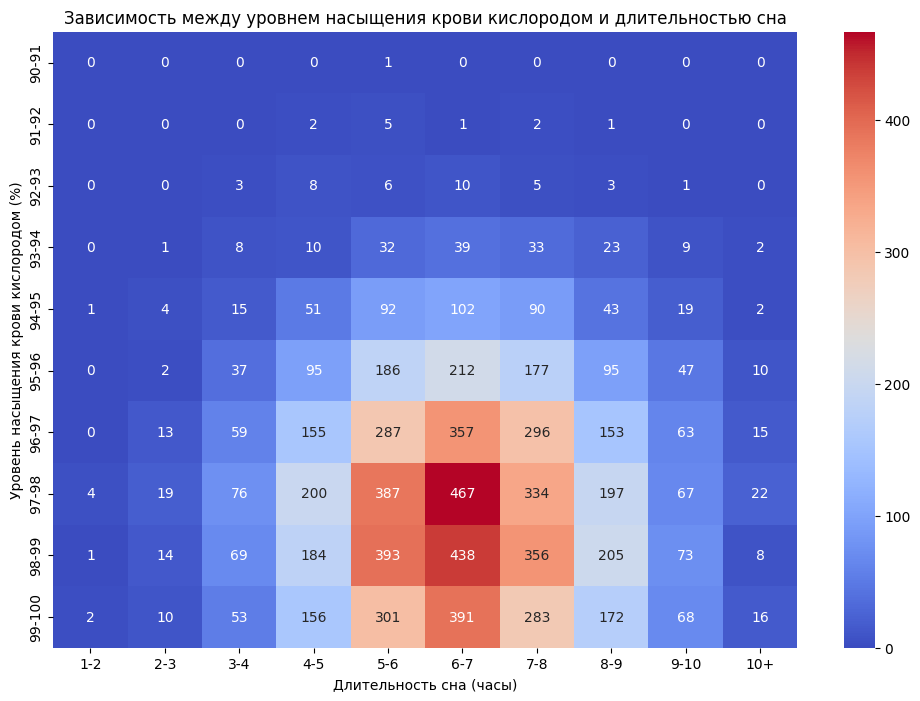

In [37]:
# Создание сводной таблицы
pivot_table = pd.pivot_table(
    df_copy,  
    index="Blood Oxygen Level (%)",  # индекс сводной таблицы
    columns="Sleep Duration (hours)",    # столбец сводной таблицы
    aggfunc="size",     # подсчитывает количество записей для каждой комбинации
    fill_value=0,      # заполнитель пропущенных значений
    observed='True'    # рассматриваются только реальные категории
)
# Построение тепловой карты
plt.figure(figsize=(12, 8))     # задаёт размер графика в дюймах
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)   # строит тепловую карту
plt.title("Зависимость между уровнем насыщения крови кислородом и длительностью сна")    # задает заголовок
plt.xlabel("Длительность сна (часы)")     # добавляет подпись к оси x
plt.ylabel("Уровень насыщения крови кислородом (%)")    # добавляет подпись к оси y
plt.show()   # отображает тепловую карту

**Вывод:** Тепловая карта наглядно демонстрирует, что большинство пользователей имеют нормальный уровень насыщения крови кислородом 96 – 98 % и спят часов 5 – 7 часов в сутки. Эти данные соответствуют физиологической норме и могут служить основой для рекомендаций по здоровому образу жизни. Аномальные значения требуют более детального изучения для выявления причин их возникновения.